## Doctor Right


#### Import Library

In [1]:
import sys
sys.path.append("../modules")
from eda import EDAAnalyzer
from spark_session import SparkManager
from feature_engineering import FeatureEngineer

In [2]:
# Load autoreload extension
%load_ext autoreload
%autoreload 2

#### Constants and config

In [3]:
mx_submits_path = "../data_sample/mx_submits.parquet/"
mx_submits_line_path = "../data_sample/mx_submitsline.parquet/"

sample_patient_id = "8aad41f612a7095449888c8050abaeb05fdee65643caa3033542610421d8bd1daaa2c4ce1757401003a1bbcd60948a7aa13eba507a676dea80e0cf76b77dbc95"

### Spark Session

In [4]:
mx_submits_spark_manager = SparkManager(mx_submits_path)
mx_submits_line_spark_manager = SparkManager(mx_submits_line_path)

24/09/19 15:54:32 WARN Utils: Your hostname, Sureshs-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 172.20.9.214 instead (on interface en0)
24/09/19 15:54:32 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/09/19 15:54:32 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [5]:
# import pyspark.sql.functions as F
# mx_submits_spark_manager.dataframe.filter(F.col("facility_provider_address_city").isNotNull()).count()

### MX SUBMITS

#### EDA

In [6]:
mx_submits_eda = EDAAnalyzer(mx_submits_spark_manager)

In [7]:
mx_submits_eda.display_head()

24/09/19 15:54:35 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,claim_number,cohort_key,cohort_record_id,attending_provider_npi,billing_provider_address_cbsa_name,billing_provider_address_city,billing_provider_address_county,billing_provider_address_key,billing_provider_address_latitude,billing_provider_address_longitude,...,type_of_bill_frequency_description,vendorname,cycle_id,patient_birth_year,patient_gender,patient_id,patient_location_preferred_latitude,patient_location_preferred_longitude,patient_location_preferred_zipcode,patient_location_preferred_type
0,d3f3ebb5cee7ccf1b9c3876060668c99,0e6b9e4a0d9103c5a9c4f1332d38ef53,afc38aa34fb64bebe04f15507e07ba17,1376869032,None,None,None,None,None,None,...,Interim (Continuing Claims),cyan,full_20240611,1964,F,8aad41f612a7095449888c8050abaeb05fdee65643caa3...,38.643135,-87.360331,47557,2.0
1,fced2c3b9dda8739b50b954b662d0e5e,0e6b9e4a0d9103c5a9c4f1332d38ef53,afc38aa34fb64bebe04f15507e07ba17,1376869032,None,None,None,None,None,None,...,Admit Through Discharge Claim,cyan,full_20240611,1964,F,8aad41f612a7095449888c8050abaeb05fdee65643caa3...,38.643135,-87.360331,47557,2.0
2,eeaaf85581b99f45028afa82b3c216f,0e6b9e4a0d9103c5a9c4f1332d38ef53,27c4b38fbb414c1d29231d9301214e52,None,"NORTH PORT-SARASOTA-BRADENTON, FL",Sarasota,Sarasota,943SBENEVARDSARASOTAFL34232,27.325453,-82.496513,...,Admit Through Discharge Claim,cyan,full_20240611,1962,U,5f1de4e894f8384574e789503276dbf4a759b40f225744...,27.329646,-82.502262,34237,1.0
3,c98ecf0bd97acc704af129d551ec9b30,0e6b9e4a0d9103c5a9c4f1332d38ef53,439846c6f66dd5939caa42094e613c7b,1598100059,None,None,None,None,None,None,...,Admit Through Discharge Claim,cyan,full_20240611,1976,F,1f9d89fd6a5cd3fdfcb387fef2c005300ca79ae5fa32ef...,39.946129,-83.815872,45504,1.0
4,c8223c08c26ee4d491bd3b17be802641,0e6b9e4a0d9103c5a9c4f1332d38ef53,db2cf4c86c3984123bfbfaef70af9f66,1659514149,None,None,None,None,None,None,...,Admit Through Discharge Claim,cyan,full_20240611,1960,F,69643c3b36d8f6df6ca79a72251f728f5fd366007a62d3...,None,None,None,NaN


In [8]:
mx_submits_eda.display_shape()

'Shape of data: rows: 247334, cols: 127'

#### Type conversion

In [9]:
mx_submits_eda.convert_columns_to_float(["claim_total_charge_amount"])

Casted claim_total_charge_amount to float


In [10]:
column_info_submits = mx_submits_eda.display_column_info()
column_info_submits.to_csv("../output/column_info_submits.csv")
column_info_submits

,Column Name,Non-null Count,Percent Non-null,Min Value,Max Value,Max Repeats,Sample,Data Type,most_frequent_value,max_repeats
0,claim_number,247334,100.000000,28,32,1.0,d3f3ebb5cee7ccf1b9c3876060668c99,string,ab40b9307eb260af878990dde200b3ff,1.0
1,vendorname,247334,100.000000,4,4,247334.0,cyan,string,cyan,247334.0
2,clearinghouse_received_date,247334,100.000000,2015-01-02,2024-09-06,4037.0,2022-01-11,date,2018-02-03,4037.0
3,cohort_key,247334,100.000000,32,32,62351.0,0e6b9e4a0d9103c5a9c4f1332d38ef53,string,f74909ace68e51891440e4da0b65a70c,62351.0
4,claim_id,247334,100.000000,28,32,1.0,d3f3ebb5cee7ccf1b9c3876060668c99,string,910d2f455e90a8195d7820ad032cb5c3,1.0
...,...,...,...,...,...,...,...,...,...,...
122,secondary_payer_plan_type,2542,1.027760,7,20,244792.0,None,string,None,244792.0
123,operating_provider_npi,2026,0.819135,10,10,245308.0,None,string,None,245308.0
124,inpatient_admitting_diagnosis_code,1828,0.739082,2,7,245506.0,None,string,None,245506.0
125,drg_code,777,0.314150,3,9,246557.0,None,string,None,246557.0


In [11]:
column_info_submits[column_info_submits["Column Name"]=="claim_total_charge_amount"]

,Column Name,Non-null Count,Percent Non-null,Min Value,Max Value,Max Repeats,Sample,Data Type,most_frequent_value,max_repeats
14,claim_total_charge_amount,246797,99.782885,-203.160004,924144.125,3212.0,23135.0,float,150.0,3212.0


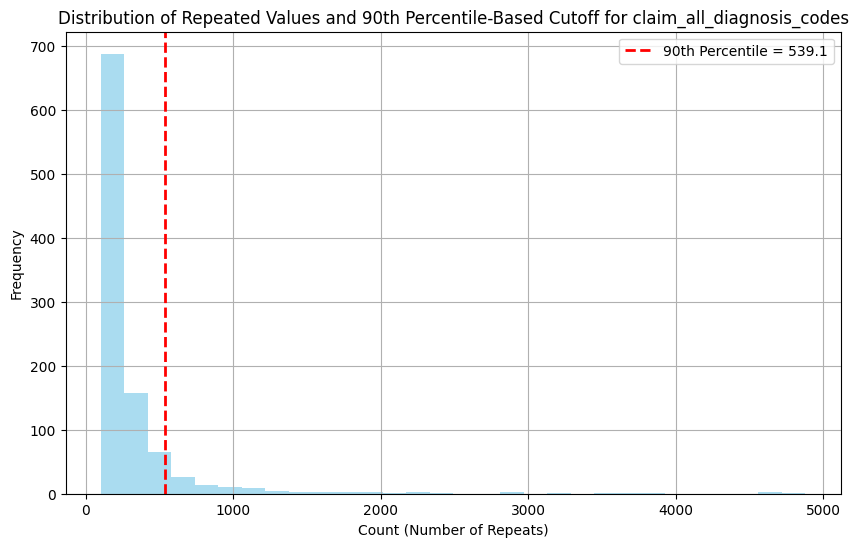

In [12]:
mx_submits_eda.plot_percentile_based_cutoff("claim_all_diagnosis_codes",90)

In [13]:
mx_submits_eda.get_top_n_repeated_values("claim_all_diagnosis_codes",5)

,claim_all_diagnosis_codes,count
0,"(ICD10, G4733, 1)",4880
1,"(ICD10, I10, 1)",4651
2,"(ICD10, I10, 2)",4584
3,"(ICD10, Z0000, 1)",3802
4,"(ICD10, I10, 3)",3740


In [14]:
mx_submits_claim_all_diagnosis_codes_repeat_count = mx_submits_eda.get_top_n_repeated_values("claim_all_diagnosis_codes")

In [15]:
most_repeated_diagnosis = mx_submits_claim_all_diagnosis_codes_repeat_count[mx_submits_claim_all_diagnosis_codes_repeat_count["count"]>=531]
most_repeated_diagnosis

,claim_all_diagnosis_codes,count
0,"(ICD10, G4733, 1)",4880
1,"(ICD10, I10, 1)",4651
2,"(ICD10, I10, 2)",4584
3,"(ICD10, Z0000, 1)",3802
4,"(ICD10, I10, 3)",3740
...,...,...
98,"(ICD10, J441, 1)",544
99,"(ICD10, J189, 1)",540
100,"(ICD10, Z452, 1)",539
101,"(ICD10, F4323, 1)",534


 - (ICD10, Z0001, 1): Encounter for general adult medical examination with abnormal findings
 - (ICD10, F4323, 1): Adjustment disorder with depressed mood
 - (ICD10, Z452, 1)	: Pneumonia, unspecified organism
 - (ICD10, J441, 1)	: Chronic obstructive pulmonary disease with acute exacerbation

In [16]:
mx_submits_eda.get_top_n_repeated_values("claim_all_diagnosis_codes",5)

,claim_all_diagnosis_codes,count
0,"(ICD10, G4733, 1)",4880
1,"(ICD10, I10, 1)",4651
2,"(ICD10, I10, 2)",4584
3,"(ICD10, Z0000, 1)",3802
4,"(ICD10, I10, 3)",3740


In [17]:
type_of_bill_facility_description_eda = mx_submits_eda.get_fill_counts_for_unique_values("type_of_bill_facility_description")
type_of_bill_facility_description_eda

,Unique Value,Column,type_count,Non-null Count,Percent Non-null
0,Skilled Nursing,claim_number,721,721,100.000000
1,Skilled Nursing,cohort_key,721,721,100.000000
2,Skilled Nursing,cohort_record_id,721,721,100.000000
3,Skilled Nursing,attending_provider_npi,721,112,15.533981
4,Skilled Nursing,billing_provider_address_cbsa_name,721,465,64.493759
...,...,...,...,...,...
877,None,patient_id,213257,213244,99.993904
878,None,patient_location_preferred_latitude,213257,188763,88.514328
879,None,patient_location_preferred_longitude,213257,188763,88.514328
880,None,patient_location_preferred_zipcode,213257,188763,88.514328


In [18]:
type_of_bill_facility_description_eda[type_of_bill_facility_description_eda["Column"]=='facility_provider_address_city']

,Unique Value,Column,type_count,Non-null Count,Percent Non-null
37,Skilled Nursing,facility_provider_address_city,721,5,0.693481
163,Intermediate Care,facility_provider_address_city,10,0,0.000000
289,Hospital,facility_provider_address_city,23494,457,1.945177
415,Home Health,facility_provider_address_city,2873,0,0.000000
541,"Specialty Facility, Hospital ASC Surgery",facility_provider_address_city,2196,202,9.198543
667,Clinic,facility_provider_address_city,4783,651,13.610705
793,None,facility_provider_address_city,213257,78679,36.893982


### MX SUBMITS LINE

#### EDA

In [19]:
mx_submits_line_eda = EDAAnalyzer(mx_submits_line_spark_manager)

In [20]:
mx_submits_line_eda.display_head()

,attending_provider_npi,billing_provider_address_cbsa_name,billing_provider_address_city,billing_provider_address_county,billing_provider_address_key,billing_provider_address_latitude,billing_provider_address_longitude,billing_provider_address_precision,billing_provider_address_region,billing_provider_address_state,...,line_level_procedure_modifier_1,line_level_procedure_modifier_2,line_level_procedure_modifier_3,line_level_procedure_modifier_4,line_level_procedure_category,line_level_revenue_code,line_level_revenue_description,line_level_from_date,line_level_to_date,line_level_units_billed
0,None,"LITTLE ROCK-NORTH LITTLE ROCK-CONWAY, AR",Little Rock,Pulaski,4301WMARKHAMSTLITTLEROCKAR72205,34.748756,-92.320251,Rooftop,South,AR,...,25,None,None,None,EVALUATION AND MANAGEMENT - OFFICE/OTHER OUTPA...,None,None,2019-11-07,2019-11-07,1.00
1,None,"LITTLE ROCK-NORTH LITTLE ROCK-CONWAY, AR",Little Rock,Pulaski,4301WMARKHAMSTLITTLEROCKAR72205,34.748756,-92.320251,Rooftop,South,AR,...,None,None,None,None,"MEDICINE - VACCINES, TOXOIDS",None,None,2019-11-07,2019-11-07,1.00
2,None,"LITTLE ROCK-NORTH LITTLE ROCK-CONWAY, AR",Little Rock,Pulaski,4301WMARKHAMSTLITTLEROCKAR72205,34.748756,-92.320251,Rooftop,South,AR,...,None,None,None,None,"MEDICINE - VACCINES, TOXOIDS",None,None,2019-11-07,2019-11-07,1.00
3,None,"LITTLE ROCK-NORTH LITTLE ROCK-CONWAY, AR",Little Rock,Pulaski,4301WMARKHAMSTLITTLEROCKAR72205,34.748756,-92.320251,Rooftop,South,AR,...,None,None,None,None,None,None,None,2019-11-07,2019-11-07,1.00
4,None,"LITTLE ROCK-NORTH LITTLE ROCK-CONWAY, AR",Little Rock,Pulaski,4301WMARKHAMSTLITTLEROCKAR72205,34.748756,-92.320251,Rooftop,South,AR,...,None,None,None,None,None,None,None,2019-11-07,2019-11-07,1.00


In [21]:
mx_submits_line_eda.display_shape()

'Shape of data: rows: 649030, cols: 150'

In [22]:
column_info_submits_line = mx_submits_line_eda.display_column_info()
column_info_submits_line.to_csv("../output/column_info_submits_line.csv")
column_info_submits_line

,Column Name,Non-null Count,Percent Non-null,Min Value,Max Value,Max Repeats,Sample,Data Type,most_frequent_value,max_repeats
0,cohort_record_id,649030,100.000000,32,32,6206.0,59439e5392ede3f442d6b455577f1e0a,string,4f0998de6738ac4b3baa08f553f2d539,6206.0
1,source_increment_id,649030,100.000000,8,8,387019.0,20210630,string,20210630,387019.0
2,claim_number,649030,100.000000,28,32,265.0,b85ed94c7fb1b3a06403eb68e4948b1d,string,61da5a13bb57c242743ed5551a63230e,265.0
3,clearinghouse_received_date,649030,100.000000,2015-01-02,2024-09-06,26287.0,2019-11-18,date,2018-02-03,26287.0
4,cohort_key,649030,100.000000,32,32,164342.0,f74909ace68e51891440e4da0b65a70c,string,767ef4cac69e8a0c77384f6e1414364b,164342.0
...,...,...,...,...,...,...,...,...,...,...
145,secondary_payer_plan_type,12519,1.928878,7,20,636511.0,None,string,None,636511.0
146,drg_code,11557,1.780657,3,9,637473.0,None,string,None,637473.0
147,line_level_procedure_modifier_3,6606,1.017827,2,2,642424.0,None,string,None,642424.0
148,line_level_procedure_modifier_4,650,0.100149,2,2,648380.0,None,string,None,648380.0


### Feature Engineering

In [23]:
mx_submits_fe = FeatureEngineer(mx_submits_spark_manager)

In [24]:
mx_submits_fe.add_comorbidities_array()

Initial DataFrame - Shape: 247334 rows, 127 columns
DataFrame After Window Function - Shape: 247334 rows, 128 columns


In [25]:
# mx_submits_fe.dataframe.limit(5).toPandas()

In [26]:
sample_patient_info = mx_submits_fe.get_rows_by_column_value("patient_id",sample_patient_id)
sample_patient_info

,claim_number,cohort_key,cohort_record_id,attending_provider_npi,billing_provider_address_cbsa_name,billing_provider_address_city,billing_provider_address_county,billing_provider_address_key,billing_provider_address_latitude,billing_provider_address_longitude,...,vendorname,cycle_id,patient_birth_year,patient_gender,patient_id,patient_location_preferred_latitude,patient_location_preferred_longitude,patient_location_preferred_zipcode,patient_location_preferred_type,previous_comorbidities
0,9dcfa4d39a6f39ccf212df8604acccad,0e6b9e4a0d9103c5a9c4f1332d38ef53,afc38aa34fb64bebe04f15507e07ba17,None,None,None,None,None,None,None,...,cyan,full_20240611,1964,F,8aad41f612a7095449888c8050abaeb05fdee65643caa3...,38.643135,-87.360331,47557,2.0,[]
1,374c7bb55d5c2141edb206f94ef1ff76,0e6b9e4a0d9103c5a9c4f1332d38ef53,afc38aa34fb64bebe04f15507e07ba17,None,"EVANSVILLE, IN-KY",Evansville,Vanderburgh,801SAINTMARYSDREVANSVILLEIN47714,37.965828,-87.504639,...,cyan,full_20240611,1964,F,8aad41f612a7095449888c8050abaeb05fdee65643caa3...,None,None,None,NaN,"[(ICD9, 56400, 1), (ICD9, 56210, 2)]"
2,e017aef8759800a11abb279682e4be06,0e6b9e4a0d9103c5a9c4f1332d38ef53,afc38aa34fb64bebe04f15507e07ba17,None,None,None,None,None,None,None,...,cyan,full_20240611,1964,F,8aad41f612a7095449888c8050abaeb05fdee65643caa3...,38.643135,-87.360331,47557,2.0,"[(ICD9, 56400, 1), (ICD9, 56210, 2)]"
3,deea8ccc1d65025905e791372918dd13,0e6b9e4a0d9103c5a9c4f1332d38ef53,afc38aa34fb64bebe04f15507e07ba17,None,"EVANSVILLE, IN-KY",Evansville,Vanderburgh,801SAINTMARYSDREVANSVILLEIN47714,37.965828,-87.504639,...,cyan,full_20240611,1964,F,8aad41f612a7095449888c8050abaeb05fdee65643caa3...,None,None,None,NaN,"[(ICD9, 56400, 1), (ICD9, 56210, 2), (ICD9, 78..."
4,1c69b986c5fa4b85cab3f5a3ce4caa14,0e6b9e4a0d9103c5a9c4f1332d38ef53,afc38aa34fb64bebe04f15507e07ba17,None,"EVANSVILLE, IN-KY",Evansville,Vanderburgh,600MARYSTEVANSVILLEIN47710,37.983086,-87.570702,...,cyan,full_20240611,1964,F,8aad41f612a7095449888c8050abaeb05fdee65643caa3...,None,None,None,NaN,"[(ICD9, 56400, 1), (ICD9, 56210, 2), (ICD9, 78..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,80193496483087a3e32366e2c57b5816,0e6b9e4a0d9103c5a9c4f1332d38ef53,afc38aa34fb64bebe04f15507e07ba17,1376869032,None,None,None,None,None,None,...,cyan,daily_20240612,1964,F,8aad41f612a7095449888c8050abaeb05fdee65643caa3...,38.643135,-87.360331,47557,2.0,"[(ICD9, 56400, 1), (ICD9, 56210, 2), (ICD9, 78..."
338,49793bc12588f1ab11ebd2795039205c,0e6b9e4a0d9103c5a9c4f1332d38ef53,afc38aa34fb64bebe04f15507e07ba17,None,"EVANSVILLE, IN-KY",Newburgh,Warrick,3800VENETIANWAYNEWBURGHIN47630,37.97937,-87.442162,...,cyan,full_20240611,1964,F,8aad41f612a7095449888c8050abaeb05fdee65643caa3...,38.643135,-87.360331,47557,2.0,"[(ICD9, 56400, 1), (ICD9, 56210, 2), (ICD9, 78..."
339,f123d255ca7a3856aef9c202a4dbd538,0e6b9e4a0d9103c5a9c4f1332d38ef53,afc38aa34fb64bebe04f15507e07ba17,None,"EVANSVILLE, IN-KY",Newburgh,Warrick,3800VENETIANWAYNEWBURGHIN47630,37.97937,-87.442162,...,cyan,full_20240611,1964,F,8aad41f612a7095449888c8050abaeb05fdee65643caa3...,38.643135,-87.360331,47557,2.0,"[(ICD9, 56400, 1), (ICD9, 56210, 2), (ICD9, 78..."
340,73f48015ee6207caf1a2d9a832703230,0e6b9e4a0d9103c5a9c4f1332d38ef53,afc38aa34fb64bebe04f15507e07ba17,1376869032,None,None,None,None,None,None,...,cyan,daily_20240712,1964,F,8aad41f612a7095449888c8050abaeb05fdee65643caa3...,38.643135,-87.360331,47557,2.0,"[(ICD9, 56400, 1), (ICD9, 56210, 2), (ICD9, 78..."


In [27]:
sample_patient_info.to_csv("../output/sample_patient_info.csv")

In [28]:
sample_patient_info[["patient_id","claim_statement_from_date","claim_all_diagnosis_codes","previous_comorbidities"]].to_csv("../output/sample_patient_info_.csv")

In [29]:
%autoreload 2